<a href="https://colab.research.google.com/github/DannaArciniega22/Extraccion-de-Caracteristicas/blob/main/actividad_4%7C_Extraccion_de_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 4| EXTRACCIÓN DE CARACTERÍSTICAS
*   Danna Paola Arciniega Zúñiga | A01731987

In [ ]:
#INSTALAR LIBRERIA PARA ANÁLISIS DE VARIABLES CATEGORICAS
%pip install funpymodeling

In [6]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
#CARGAR ARCHIVOS
from google.colab import files
files.upload()

In [8]:
#CARGA DESDE UN ARCHIVO .csv SIN INDICE
Micro_Retailer = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [9]:
#INFORMACION DEL DATAFRAME
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [10]:
#MOSTRAR TODAS LA COLUMNAS
pd.options.display.max_columns= None

In [11]:
#IMPRIMIR LOS PRIMEROS 5 REGISTROS
Micro_Retailer.head(3)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

####Limpieza de datos

In [12]:
#COLUMNAS FILTRADAS | 20 COLUMNAS CUALITATIVAS
data_columnas=Micro_Retailer.iloc[:,[1,3,9,10,11,12,15,25,26,27,35,36,47,48,53,86,87,88,91,96]]
data_columnas.head(3)

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,20_reviews_finances_monthly,49_inventory_records,18_sales_records,210_sales_channels,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,193_sales_planning_tools,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,249_technology_training,261_technology_organization
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,yes,Software especializado + computadora,Software especializado + computadora,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,no,Software especializado,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,NaN,NaN
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),yes,No lo hago,No lo hago,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",NaN,NaN
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",yes,En Excel,Software especializado + computadora,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,NaN,Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes...",Perder la venta,NaN,NaN


In [13]:
#IDENTIFICAR VALORES NULOS
valores_nulos=data_columnas.isnull().sum()
valores_nulos

_title                                                     0
_updated_by                                                0
232_type_of_store                                          0
108_does_the_micro_retailer_has_a_barred_window_           0
99_does_the_micro_retailer_exhibits_products_outside_      0
102_does_the_micro_retailer_sells_fresh_products_          0
184_store_devices                                          2
20_reviews_finances_monthly                               63
49_inventory_records                                      61
18_sales_records                                          61
210_sales_channels                                        89
189_payment_methods                                       64
214_customer_relationship_tools                           76
33_credit_to_customers                                    64
193_sales_planning_tools                                  89
157_frequency_organize_shelves                            75
158_charact_organize_pro

In [14]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF | 1
data_columnas_1=data_columnas.fillna(method="bfill")

#IDENTIFICAR VALORES NULOS
valores_nulos_1=data_columnas_1.isnull().sum()
valores_nulos_1

<ipython-input-14-d254fd060d20>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_columnas_1=data_columnas.fillna(method="bfill")


_title                                                   0
_updated_by                                              0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
20_reviews_finances_monthly                              5
49_inventory_records                                     5
18_sales_records                                         5
210_sales_channels                                       5
189_payment_methods                                      5
214_customer_relationship_tools                          5
33_credit_to_customers                                   5
193_sales_planning_tools                                 5
157_frequency_organize_shelves                           5
158_charact_organize_products_on_shelves                

In [15]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF | 2
data_columnas=data_columnas_1.fillna(method="ffill")

#IDENTIFICAR VALORES NULOS
valores_nulos_2=data_columnas.isnull().sum()
valores_nulos_2

<ipython-input-15-38c0ec428b04>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_columnas=data_columnas_1.fillna(method="ffill")


_title                                                   0
_updated_by                                              0
232_type_of_store                                        0
108_does_the_micro_retailer_has_a_barred_window_         0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
184_store_devices                                        0
20_reviews_finances_monthly                              0
49_inventory_records                                     0
18_sales_records                                         0
210_sales_channels                                       0
189_payment_methods                                      0
214_customer_relationship_tools                          0
33_credit_to_customers                                   0
193_sales_planning_tools                                 0
157_frequency_organize_shelves                           0
158_charact_organize_products_on_shelves                

In [16]:
#INFORMACION DEL DATAFRAME UNICAMENTE DE LAS 20 COLUMNAS
data_columnas.info()
#NOTA:Todos los datos de las columnas seleccionadas con tipo object por lo tanto, se es necesario aplicar metodos para eliminar outliers del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   _title                                                 171 non-null    object
 1   _updated_by                                            171 non-null    object
 2   232_type_of_store                                      171 non-null    object
 3   108_does_the_micro_retailer_has_a_barred_window_       171 non-null    object
 4   99_does_the_micro_retailer_exhibits_products_outside_  171 non-null    object
 5   102_does_the_micro_retailer_sells_fresh_products_      171 non-null    object
 6   184_store_devices                                      171 non-null    object
 7   20_reviews_finances_monthly                            171 non-null    object
 8   49_inventory_records                                   171 n

####Análisis Univariado

In [17]:
#OBTENER UN ANALISIS UNIVARIADO DE LAS VARIABLES CATEGORICAS
freq_tbl(data_columnas)

              _title  frequency  percentage  cumulative_perc
0   November 9, 2022         73    0.426901         0.426901
1  November 10, 2022         26    0.152047         0.578947
2   November 7, 2022         20    0.116959         0.695906
3   November 3, 2022         16    0.093567         0.789474
4  November 12, 2022         15    0.087719         0.877193
5   November 8, 2022         10    0.058480         0.935673
6   November 4, 2022          9    0.052632         0.988304
7  November 11, 2022          1    0.005848         0.994152
8   November 2, 2022          1    0.005848         1.000000

----------------------------------------------------------------

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3          

##### Columna 1| _title

In [18]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna1 = freq_tbl(data_columnas['_title'])
columna1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304
7,"November 11, 2022",1,0.005848,0.994152
8,"November 2, 2022",1,0.005848,1.000000


In [19]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_1=columna1[columna1['frequency']>1]
Filtro_1

,_title,frequency,percentage,cumulative_perc
0,"November 9, 2022",73,0.426901,0.426901
1,"November 10, 2022",26,0.152047,0.578947
2,"November 7, 2022",20,0.116959,0.695906
3,"November 3, 2022",16,0.093567,0.789474
4,"November 12, 2022",15,0.087719,0.877193
5,"November 8, 2022",10,0.058480,0.935673
6,"November 4, 2022",9,0.052632,0.988304


In [20]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_1=Filtro_1.set_index('_title')
Filtro_index_1

,frequency,percentage,cumulative_perc
_title,,,
"November 9, 2022",73,0.426901,0.426901
"November 10, 2022",26,0.152047,0.578947
"November 7, 2022",20,0.116959,0.695906
"November 3, 2022",16,0.093567,0.789474
"November 12, 2022",15,0.087719,0.877193
"November 8, 2022",10,0.058480,0.935673
"November 4, 2022",9,0.052632,0.988304


In [21]:
#ELIMINAR COLUMNAS INNECESARIAS
_title_1=Filtro_index_1.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

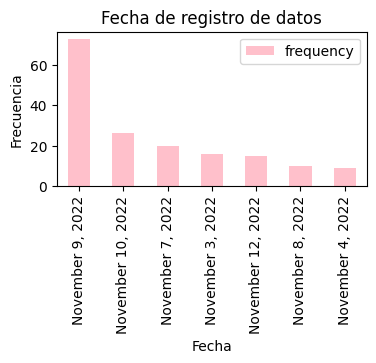

In [22]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
_title_1.plot(kind = 'bar', width=0.5, figsize=(4,2), color="pink")
plt.title ('Fecha de registro de datos')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')

##### Columna 2 | _updated_by

In [23]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna2 = freq_tbl(data_columnas['_updated_by'])
columna2

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [24]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_2=columna2[columna2['frequency']>1]
Filtro_2

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [25]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_2=Filtro_2.set_index('_updated_by')
Filtro_index_2

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


In [26]:
#ELIMINAR COLUMNAS INNECESARIAS
_updated_by=Filtro_index_2.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

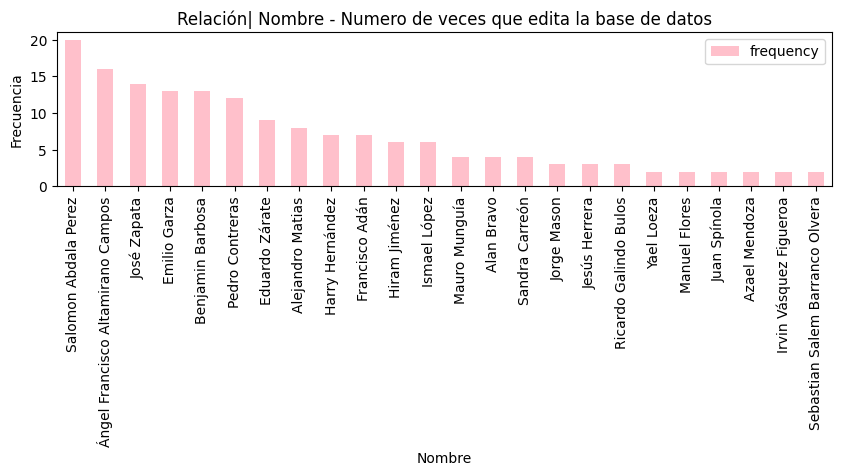

In [117]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
_updated_by.plot(kind = 'bar', width=0.5, figsize=(10,2), color="pink")
plt.title ('Relación| Nombre - Numero de veces que edita la base de datos')
plt.xlabel('Nombre')
plt.ylabel('Frecuencia')

##### Columna 3 | 232_type_of_store

In [28]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna3 = freq_tbl(data_columnas['232_type_of_store'])
columna3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [29]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_3=columna3[columna3['frequency']>1]
Filtro_3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [30]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_3=Filtro_3.set_index('232_type_of_store')
Filtro_index_3

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


In [31]:
#ELIMINAR COLUMNAS INNECESARIAS
nuevo_232_type_of_store=Filtro_index_3.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

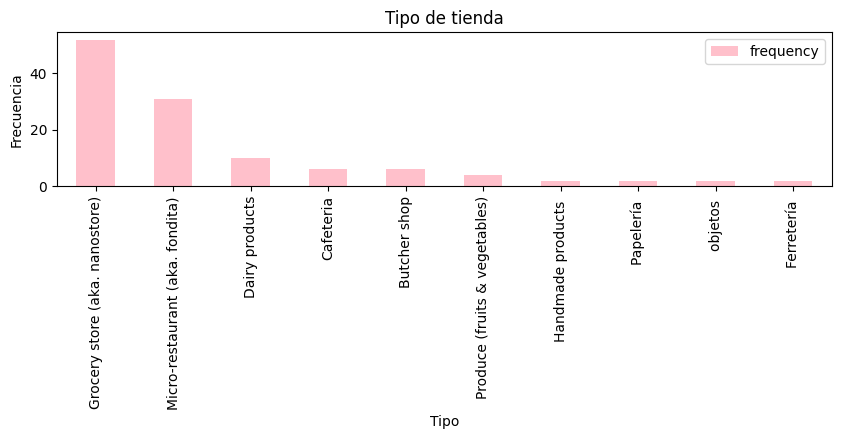

In [33]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
nuevo_232_type_of_store.plot(kind = 'bar', width=0.5, figsize=(10,2),color="pink")
plt.title ('Tipo de tienda')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

##### Columna 4 | 108_does_the_micro_retailer_has_a_barred_window_

In [34]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna4 = freq_tbl(data_columnas['108_does_the_micro_retailer_has_a_barred_window_'])
columna4

,108_does_the_micro_retailer_has_a_barred_window_,frequency,percentage,cumulative_perc
0,no,124,0.725146,0.725146
1,yes,47,0.274854,1.000000


In [35]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_4=columna4.set_index('108_does_the_micro_retailer_has_a_barred_window_')

<Axes: ylabel='frequency'>

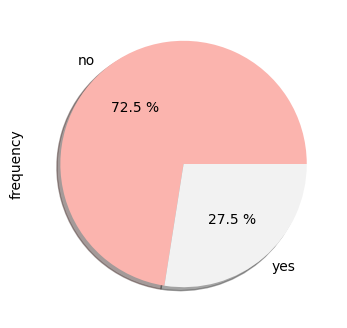

In [36]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_4["frequency"].plot(kind = 'pie',figsize=(8,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 5 | 99_does_the_micro_retailer_exhibits_products_outside_

In [37]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna5= freq_tbl(data_columnas['99_does_the_micro_retailer_exhibits_products_outside_'])
columna5

,99_does_the_micro_retailer_exhibits_products_outside_,frequency,percentage,cumulative_perc
0,no,120,0.701754,0.701754
1,yes,51,0.298246,1.000000


In [38]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_5=columna5.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index_5

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

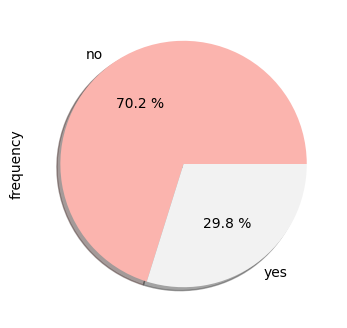

In [39]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_5["frequency"].plot(kind = 'pie',figsize=(8,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 6 | 102_does_the_micro_retailer_sells_fresh_products_

In [40]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna6= freq_tbl(data_columnas['102_does_the_micro_retailer_sells_fresh_products_'])
columna6

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [41]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_6=columna6.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index_6

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


<Axes: ylabel='frequency'>

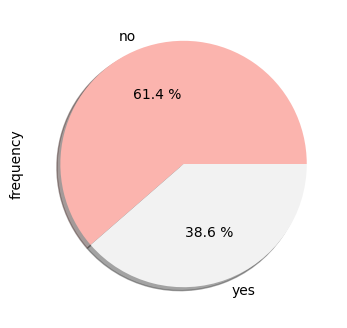

In [42]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_6["frequency"].plot(kind = 'pie',figsize=(8,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 7 | 184_store_devices

In [43]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna7= freq_tbl(data_columnas['184_store_devices'])
columna7

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363
9,Dataphone (i.e. card payments),4,0.023392,0.701754


In [48]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_7=columna7[columna7['frequency']>3]
Filtro_7

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363
9,Dataphone (i.e. card payments),4,0.023392,0.701754


In [49]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_7=Filtro_7.set_index('184_store_devices')
Filtro_index_7

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"Analog cash register,Security cameras,Smartphone",5,0.029240,0.678363


In [50]:
#ELIMINAR COLUMNAS INNECESARIAS
store_devices=Filtro_index_7.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

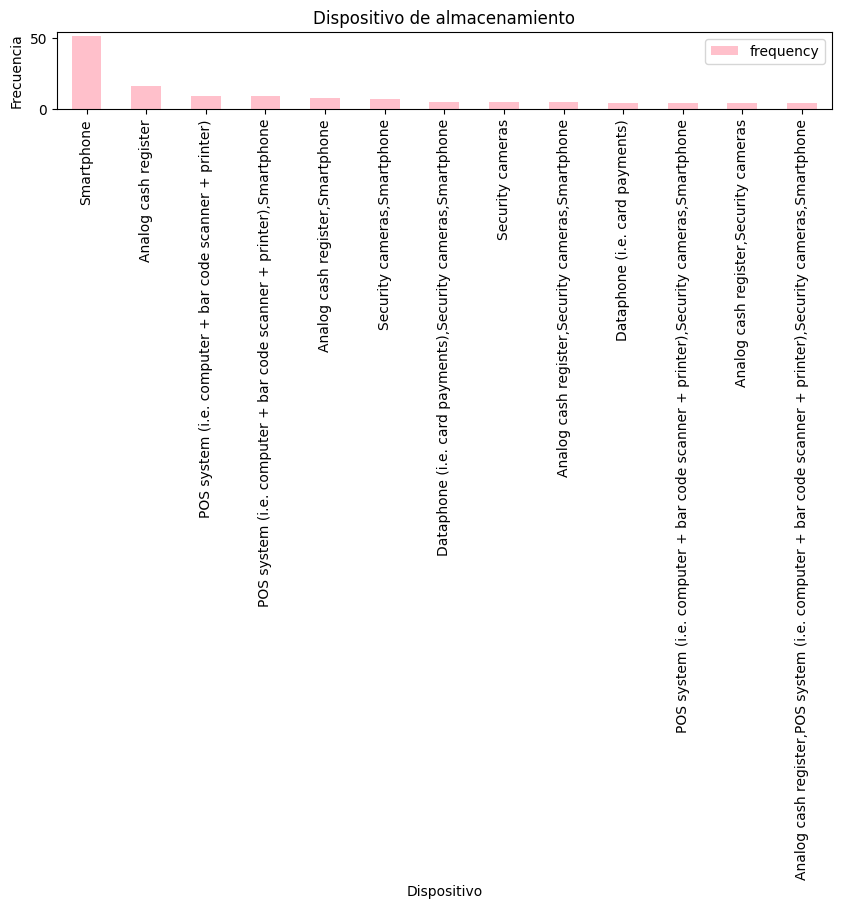

In [51]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
store_devices.plot(kind = 'bar', width=0.5, figsize=(10,1),color="pink")
plt.title ('Dispositivo de almacenamiento')
plt.xlabel('Dispositivo')
plt.ylabel('Frecuencia')

##### Columna 8 | 20_reviews_finances_monthly

In [52]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna8= freq_tbl(data_columnas['20_reviews_finances_monthly'])
columna8

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,127,0.74269,0.74269
1,no,44,0.25731,1.00000


In [53]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_8=columna8.set_index('20_reviews_finances_monthly')
Filtro_index_8

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,127,0.74269,0.74269
no,44,0.25731,1.00000


<Axes: ylabel='frequency'>

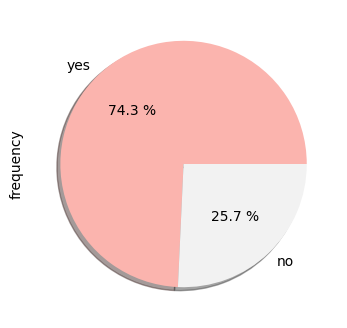

In [54]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_8["frequency"].plot(kind = 'pie',figsize=(8,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 9 | 49_inventory_records


In [55]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna9= freq_tbl(data_columnas['49_inventory_records'])
columna9

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456
6,Mentalmente,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [56]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_9=columna9[columna9['frequency']>1]
Filtro_9

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,65,0.380117,0.380117
1,En Excel,31,0.181287,0.561404
2,Software especializado + computadora,29,0.169591,0.730994
3,No lo hago,24,0.140351,0.871345
4,"En Excel,En papel",17,0.099415,0.970760
5,Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456


In [57]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_9=Filtro_9.set_index('49_inventory_records')
Filtro_index_9

,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,65,0.380117,0.380117
En Excel,31,0.181287,0.561404
Software especializado + computadora,29,0.169591,0.730994
No lo hago,24,0.140351,0.871345
"En Excel,En papel",17,0.099415,0.970760
Aplicación móvil (i.e. App) + smartphone,2,0.011696,0.982456


In [58]:
#ELIMINAR COLUMNAS INNECESARIAS
inventory_records=Filtro_index_9.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

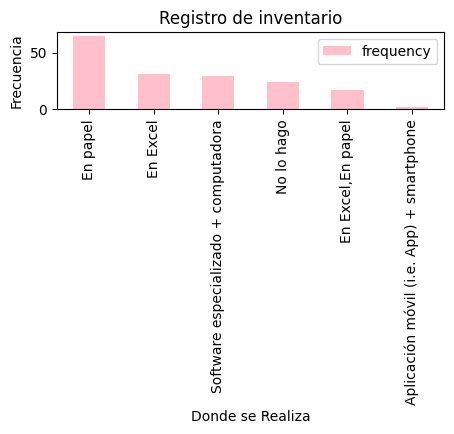

In [59]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
inventory_records.plot(kind = 'bar', width=0.5, figsize=(5,1), color="pink")
plt.title ('Registro de inventario')
plt.xlabel('Donde se Realiza')
plt.ylabel('Frecuencia')

##### Columna 10 | 18_sales_records


In [60]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna10= freq_tbl(data_columnas['18_sales_records'])
columna10

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,67,0.391813,0.391813
1,Software especializado + computadora,26,0.152047,0.543860
2,No lo hago,24,0.140351,0.684211
3,En Excel,21,0.122807,0.807018
4,"En Excel,En papel",12,0.070175,0.877193
5,Caja registradora (análoga),6,0.035088,0.912281
6,"Aplicación móvil (i.e. App) + smartphone,Caja ...",5,0.029240,0.941520
7,"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064
8,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.964912
9,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.970760


In [61]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_10=columna10[columna10['frequency']>1]
Filtro_10

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,67,0.391813,0.391813
1,Software especializado + computadora,26,0.152047,0.543860
2,No lo hago,24,0.140351,0.684211
3,En Excel,21,0.122807,0.807018
4,"En Excel,En papel",12,0.070175,0.877193
5,Caja registradora (análoga),6,0.035088,0.912281
6,"Aplicación móvil (i.e. App) + smartphone,Caja ...",5,0.029240,0.941520
7,"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064


In [62]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_10=Filtro_10.set_index('18_sales_records')
Filtro_index_10

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,67,0.391813,0.391813
Software especializado + computadora,26,0.152047,0.543860
No lo hago,24,0.140351,0.684211
En Excel,21,0.122807,0.807018
"En Excel,En papel",12,0.070175,0.877193
Caja registradora (análoga),6,0.035088,0.912281
"Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga),Software especializado + computadora",5,0.029240,0.941520
"Caja registradora (análoga),En Excel,En papel",3,0.017544,0.959064


In [64]:
#ELIMINAR COLUMNAS INNECESARIAS
sales_records=Filtro_index_10.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

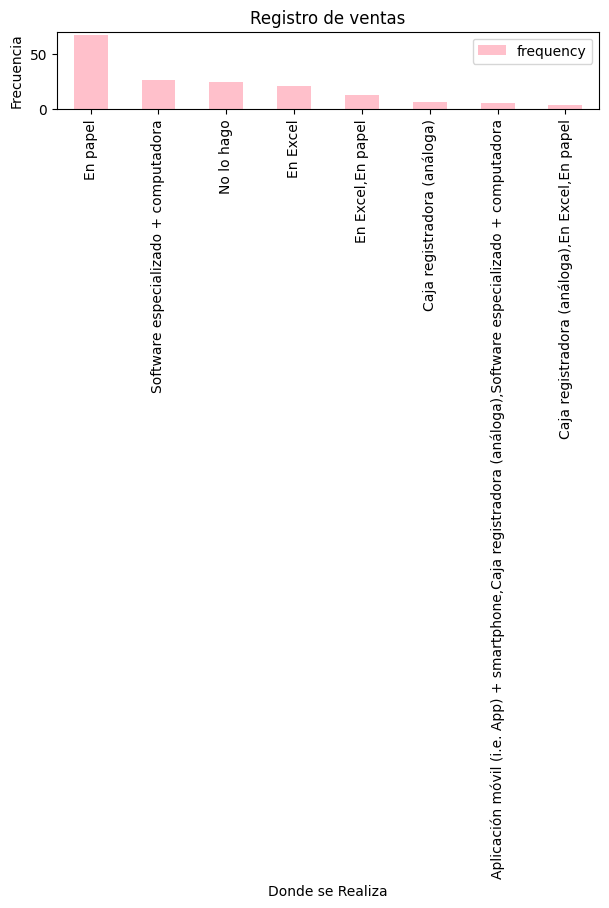

In [65]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
sales_records.plot(kind = 'bar', width=0.5, figsize=(7,1),color="pink")
plt.title ('Registro de ventas')
plt.xlabel('Donde se Realiza')
plt.ylabel('Frecuencia')

##### Columna 11 | 210_sales_channels



In [66]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna11 = freq_tbl(data_columnas['210_sales_channels'])
columna11

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram),What...",26,0.152047,0.152047
1,WhatsApp,22,0.128655,0.280702
2,"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
3,Llamada a Teléfono fijo,12,0.070175,0.467836
4,conocidos paquetes cerrados,10,0.058480,0.526316
5,"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.573099
6,Llamada a Teléfono celular,7,0.040936,0.614035
7,"Página web propia,WhatsApp",7,0.040936,0.654971
8,"Llamada a Teléfono celular,Redes sociales (e.g...",7,0.040936,0.695906
9,"Página web propia,Redes sociales (e.g. Faceboo...",7,0.040936,0.736842


In [70]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_11=columna11[columna11['frequency']>3]
Filtro_11

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram),What...",26,0.152047,0.152047
1,WhatsApp,22,0.128655,0.280702
2,"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
3,Llamada a Teléfono fijo,12,0.070175,0.467836
4,conocidos paquetes cerrados,10,0.058480,0.526316
5,"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.573099
6,Llamada a Teléfono celular,7,0.040936,0.614035
7,"Página web propia,WhatsApp",7,0.040936,0.654971
8,"Llamada a Teléfono celular,Redes sociales (e.g...",7,0.040936,0.695906
9,"Página web propia,Redes sociales (e.g. Faceboo...",7,0.040936,0.736842


In [71]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_11=Filtro_11.set_index('210_sales_channels')
Filtro_index_11

,frequency,percentage,cumulative_perc
210_sales_channels,,,
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",26,0.152047,0.152047
WhatsApp,22,0.128655,0.280702
"Redes sociales (e.g. Facebook, Instagram)",20,0.116959,0.397661
Llamada a Teléfono fijo,12,0.070175,0.467836
conocidos paquetes cerrados,10,0.058480,0.526316
"Llamada a Teléfono celular,WhatsApp",8,0.046784,0.573099
Llamada a Teléfono celular,7,0.040936,0.614035
"Página web propia,WhatsApp",7,0.040936,0.654971
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",7,0.040936,0.695906


In [72]:
#ELIMINAR COLUMNAS INNECESARIAS
sales_channels=Filtro_index_11.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

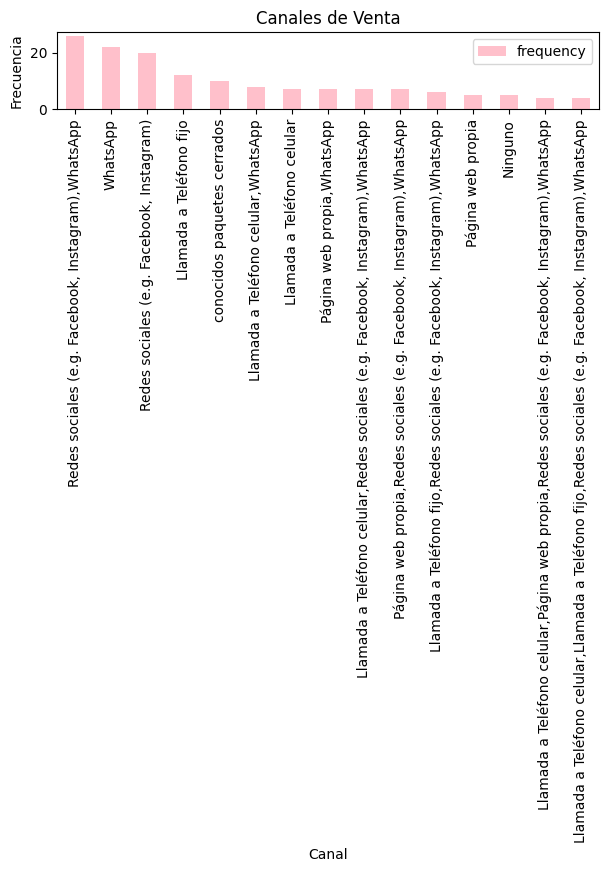

In [73]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
sales_channels.plot(kind = 'bar', width=0.5, figsize=(7,1), color="pink")
plt.title ('Canales de Venta')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')

##### Columna 12 | 189_payment_methods

In [75]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna12 = freq_tbl(data_columnas['189_payment_methods'])
columna12

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [76]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_12=columna12[columna12['frequency']>1]
Filtro_12

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,64,0.374269,0.374269
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",49,0.286550,0.660819
2,"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
3,"Efectivo,Transferencia interbancaria",20,0.116959,0.982456


In [77]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_12=Filtro_12.set_index('189_payment_methods')
Filtro_index_12

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,64,0.374269,0.374269
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",49,0.286550,0.660819
"Efectivo,Tarjeta de débito y/o crédito",35,0.204678,0.865497
"Efectivo,Transferencia interbancaria",20,0.116959,0.982456


<Axes: ylabel='frequency'>

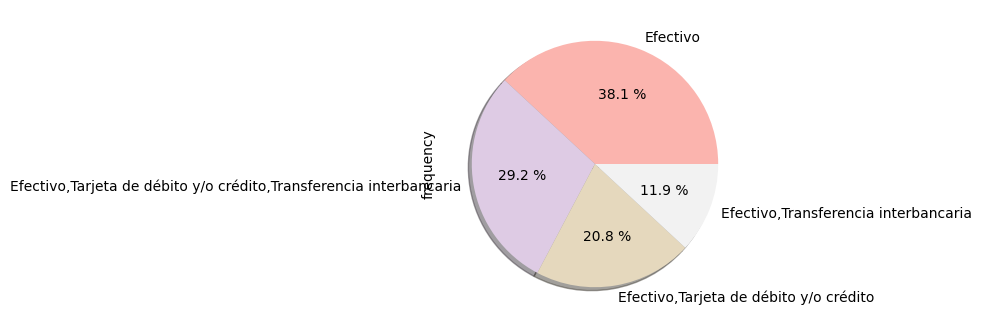

In [78]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_12["frequency"].plot(kind = 'pie',figsize=(10,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 13 |  214_customer_relationship_tools

In [79]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna13 = freq_tbl(data_columnas['214_customer_relationship_tools'])
columna13

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,57,0.333333,0.333333
1,Ninguna,44,0.257310,0.590643
2,Aplicación móvil,31,0.181287,0.771930
3,"Aplicación móvil,Redes sociales",22,0.128655,0.900585
4,Cuaderno,9,0.052632,0.953216
5,Teléfono,1,0.005848,0.959064
6,"Cuaderno,Redes sociales",1,0.005848,0.964912
7,"Aplicación móvil,De frente",1,0.005848,0.970760
8,Físico,1,0.005848,0.976608
9,"Aplicación móvil,Ninguna",1,0.005848,0.982456


In [80]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_13=columna13 .set_index('214_customer_relationship_tools')
Filtro_index_13

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,57,0.333333,0.333333
Ninguna,44,0.257310,0.590643
Aplicación móvil,31,0.181287,0.771930
"Aplicación móvil,Redes sociales",22,0.128655,0.900585
Cuaderno,9,0.052632,0.953216
Teléfono,1,0.005848,0.959064
"Cuaderno,Redes sociales",1,0.005848,0.964912
"Aplicación móvil,De frente",1,0.005848,0.970760
Físico,1,0.005848,0.976608


In [81]:
#ELIMINAR COLUMNAS INNECESARIAS
customer_relationship_tools=Filtro_index_13.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

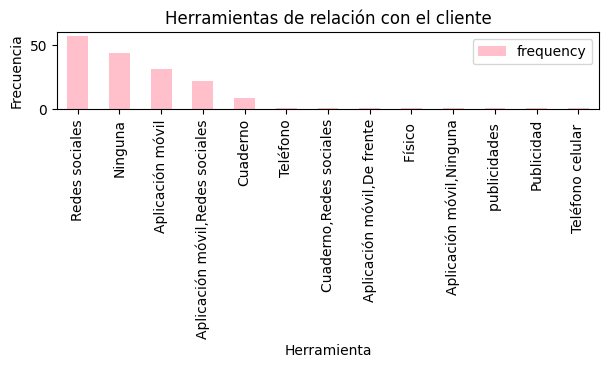

In [83]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
customer_relationship_tools.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Herramientas de relación con el cliente')
plt.xlabel('Herramienta')
plt.ylabel('Frecuencia')

##### Columna 14 | 33_credit_to_customers

In [84]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna14 = freq_tbl(data_columnas['33_credit_to_customers'])
columna14

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,135,0.789474,0.789474
1,yes,36,0.210526,1.000000


In [85]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_14=columna14.set_index('33_credit_to_customers')
Filtro_index_14

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,135,0.789474,0.789474
yes,36,0.210526,1.000000


<Axes: ylabel='frequency'>

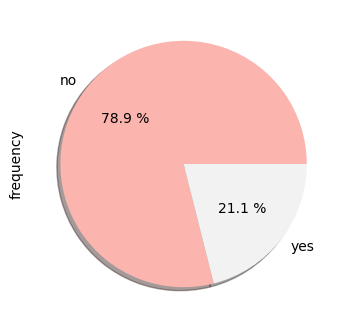

In [86]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_14["frequency"].plot(kind = 'pie',figsize=(10,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 15 | 193_sales_planning_tools

In [87]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna15 = freq_tbl(data_columnas['193_sales_planning_tools'])
columna15

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,71,0.415205,0.415205
1,Cuaderno,37,0.216374,0.631579
2,Software especializado,29,0.169591,0.801170
3,Excel,16,0.093567,0.894737
4,"Cuaderno,Excel",4,0.023392,0.918129
5,"Cuaderno,Ninguna",2,0.011696,0.929825
6,En físico,2,0.011696,0.941520
7,Other,1,0.005848,0.947368
8,Mental,1,0.005848,0.953216
9,Por temporada de pan,1,0.005848,0.959064


In [88]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_15=columna15[columna15['frequency']>1]
Filtro_15

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,71,0.415205,0.415205
1,Cuaderno,37,0.216374,0.631579
2,Software especializado,29,0.169591,0.801170
3,Excel,16,0.093567,0.894737
4,"Cuaderno,Excel",4,0.023392,0.918129
5,"Cuaderno,Ninguna",2,0.011696,0.929825
6,En físico,2,0.011696,0.941520


In [89]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_15=Filtro_15.set_index('193_sales_planning_tools')
Filtro_index_15

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,71,0.415205,0.415205
Cuaderno,37,0.216374,0.631579
Software especializado,29,0.169591,0.801170
Excel,16,0.093567,0.894737
"Cuaderno,Excel",4,0.023392,0.918129
"Cuaderno,Ninguna",2,0.011696,0.929825
En físico,2,0.011696,0.941520


In [90]:
#ELIMINAR COLUMNAS INNECESARIAS
sales_planning_tools=Filtro_index_15.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

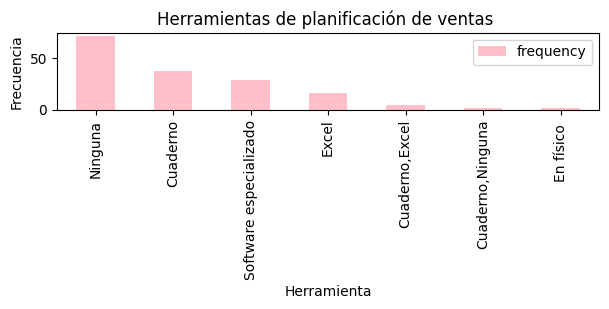

In [91]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
sales_planning_tools.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Herramientas de planificación de ventas ')
plt.xlabel('Herramienta')
plt.ylabel('Frecuencia')

##### Columna 16 | 157_frequency_organize_shelves

In [92]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna16 = freq_tbl(data_columnas['157_frequency_organize_shelves'])
columna16

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,Semanalmente,73,0.426901,0.426901
1,Diariamente,46,0.269006,0.695906
2,Mensualmente,22,0.128655,0.824561
3,Nunca,16,0.093567,0.918129
4,Quincenalmente,10,0.058480,0.976608
5,Anualmente,2,0.011696,0.988304
6,Semestralmente,1,0.005848,0.994152
7,No se tiene,1,0.005848,1.000000


In [93]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_16=columna16.set_index('157_frequency_organize_shelves')
Filtro_index_16

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Semanalmente,73,0.426901,0.426901
Diariamente,46,0.269006,0.695906
Mensualmente,22,0.128655,0.824561
Nunca,16,0.093567,0.918129
Quincenalmente,10,0.058480,0.976608
Anualmente,2,0.011696,0.988304
Semestralmente,1,0.005848,0.994152
No se tiene,1,0.005848,1.000000


In [94]:
#ELIMINAR COLUMNAS INNECESARIAS
frequency_organize_shelves=Filtro_index_16.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

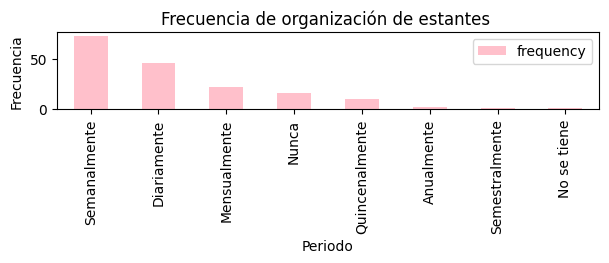

In [95]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
frequency_organize_shelves.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Frecuencia de organización de estantes ')
plt.xlabel('Periodo')
plt.ylabel('Frecuencia')

##### Columna 17 | 158_charact_organize_products_on_shelves


In [96]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna17 = freq_tbl(data_columnas['158_charact_organize_products_on_shelves'])
columna17

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",66,0.385965,0.385965
1,Tamaño,28,0.163743,0.549708
2,Frecuencia de venta,24,0.140351,0.690058
3,Margen de utilidad,14,0.081871,0.771930
4,Precio,9,0.052632,0.824561
5,"Refrigeración,Tamaño",6,0.035088,0.859649
6,"Categoría (e.g. limpieza, aseo personal, comes...",4,0.023392,0.883041
7,Refrigeración,4,0.023392,0.906433
8,"Frecuencia de venta,Refrigeración",3,0.017544,0.923977
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.935673


In [101]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_17=columna17[columna17['frequency']>2]
Filtro_17

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,"Categoría (e.g. limpieza, aseo personal, comes...",66,0.385965,0.385965
1,Tamaño,28,0.163743,0.549708
2,Frecuencia de venta,24,0.140351,0.690058
3,Margen de utilidad,14,0.081871,0.771930
4,Precio,9,0.052632,0.824561
5,"Refrigeración,Tamaño",6,0.035088,0.859649
6,"Categoría (e.g. limpieza, aseo personal, comes...",4,0.023392,0.883041
7,Refrigeración,4,0.023392,0.906433
8,"Frecuencia de venta,Refrigeración",3,0.017544,0.923977


In [102]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_17=Filtro_17.set_index('158_charact_organize_products_on_shelves')
Filtro_index_17

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",66,0.385965,0.385965
Tamaño,28,0.163743,0.549708
Frecuencia de venta,24,0.140351,0.690058
Margen de utilidad,14,0.081871,0.771930
Precio,9,0.052632,0.824561
"Refrigeración,Tamaño",6,0.035088,0.859649
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración",4,0.023392,0.883041
Refrigeración,4,0.023392,0.906433
"Frecuencia de venta,Refrigeración",3,0.017544,0.923977


In [103]:
#ELIMINAR COLUMNAS INNECESARIAS
charact_organize_products_on_shelves=Filtro_index_17.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

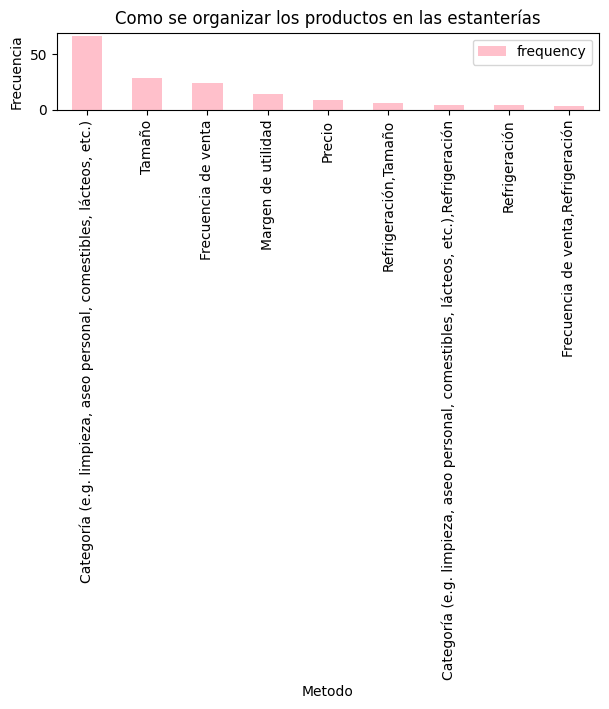

In [104]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
charact_organize_products_on_shelves.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Como se organizar los productos en las estanterías')
plt.xlabel('Metodo')
plt.ylabel('Frecuencia')

##### Columna 18 | 161_actions_stockouts

In [105]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna18 = freq_tbl(data_columnas['161_actions_stockouts'])
columna18

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Solicitar tiempo al cliente para conseguir el ...,68,0.397661,0.397661
1,Ofrecer un producto sustituto,40,0.233918,0.631579
2,"Ofrecer un producto sustituto,Solicitar tiempo...",17,0.099415,0.730994
3,"Informar al proveedor,Ofrecer un producto sust...",10,0.058480,0.789474
4,Perder la venta,9,0.052632,0.842105
5,Informar al proveedor,9,0.052632,0.894737
6,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.923977
7,apuntar,5,0.029240,0.953216
8,"Informar al proveedor,Ofrecer un producto sust...",2,0.011696,0.964912
9,"Informar al proveedor,Perder la venta",2,0.011696,0.976608


In [106]:
#OBTENER UN FILTRO DE LOS VALORES MAS REELEVANTES DE LA VARIABLE CATEGORICA SELECCIONADA
Filtro_18=columna18[columna18['frequency']>2]
Filtro_18

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,Solicitar tiempo al cliente para conseguir el ...,68,0.397661,0.397661
1,Ofrecer un producto sustituto,40,0.233918,0.631579
2,"Ofrecer un producto sustituto,Solicitar tiempo...",17,0.099415,0.730994
3,"Informar al proveedor,Ofrecer un producto sust...",10,0.058480,0.789474
4,Perder la venta,9,0.052632,0.842105
5,Informar al proveedor,9,0.052632,0.894737
6,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.923977
7,apuntar,5,0.029240,0.953216


In [107]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_18=Filtro_18.set_index('161_actions_stockouts')
Filtro_index_18

,frequency,percentage,cumulative_perc
161_actions_stockouts,,,
Solicitar tiempo al cliente para conseguir el producto,68,0.397661,0.397661
Ofrecer un producto sustituto,40,0.233918,0.631579
"Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto",17,0.099415,0.730994
"Informar al proveedor,Ofrecer un producto sustituto",10,0.058480,0.789474
Perder la venta,9,0.052632,0.842105
Informar al proveedor,9,0.052632,0.894737
"Informar al proveedor,Solicitar tiempo al cliente para conseguir el producto",5,0.029240,0.923977
apuntar,5,0.029240,0.953216


In [108]:
#ELIMINAR COLUMNAS INNECESARIAS
actions_stockouts=Filtro_index_18.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

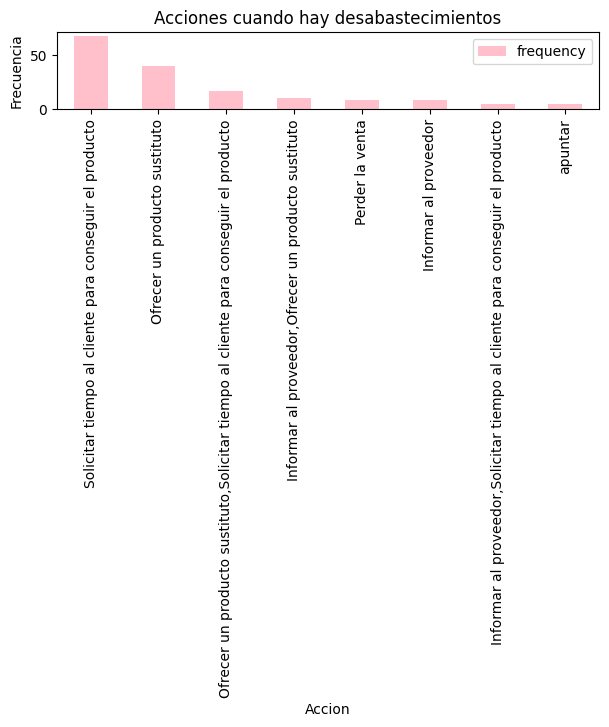

In [109]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
actions_stockouts.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Acciones cuando hay desabastecimientos')
plt.xlabel('Accion')
plt.ylabel('Frecuencia')


##### Columna 19 | 249_technology_training

In [110]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna19 = freq_tbl(data_columnas['249_technology_training'])
columna19

,249_technology_training,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,79,0.461988,0.461988
1,De acuerdo,62,0.362573,0.824561
2,Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
3,Totalmente en desacuerdo,10,0.058480,0.994152
4,En desacuerdo,1,0.005848,1.000000


In [111]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_19=columna19 .set_index('249_technology_training')
Filtro_index_19

,frequency,percentage,cumulative_perc
249_technology_training,,,
Totalmente de acuerdo,79,0.461988,0.461988
De acuerdo,62,0.362573,0.824561
Ni de acuerdo ni en desacuerdo,19,0.111111,0.935673
Totalmente en desacuerdo,10,0.058480,0.994152
En desacuerdo,1,0.005848,1.000000


<Axes: ylabel='frequency'>

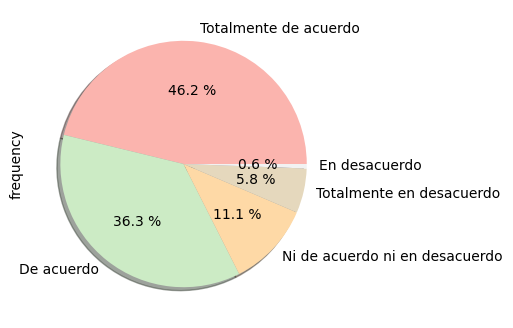

In [112]:
#REALIZAMOS UN GRAFICO DE PASTEL DEL DATA FRAME FILTRADO
Filtro_index_19["frequency"].plot(kind = 'pie',figsize=(10,4),shadow=True,autopct="%0.1f %%",cmap='Pastel1')

##### Columna 20 | 261_technology_organization

In [113]:
#OBTENER UN ANALISIS UNIVARIADO DE UNA VARIABLE CATEGORICA EN ESPECIFICO
columna20 = freq_tbl(data_columnas['261_technology_organization'])
columna20

,261_technology_organization,frequency,percentage,cumulative_perc
0,Totalmente de acuerdo,71,0.415205,0.415205
1,De acuerdo,67,0.391813,0.807018
2,Totalmente en desacuerdo,16,0.093567,0.900585
3,Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
4,En desacuerdo,2,0.011696,1.000000


In [114]:
#AJUSTO EL INDICE DE MI DATAFRAME
Filtro_index_20=columna20.set_index('261_technology_organization')
Filtro_index_20

,frequency,percentage,cumulative_perc
261_technology_organization,,,
Totalmente de acuerdo,71,0.415205,0.415205
De acuerdo,67,0.391813,0.807018
Totalmente en desacuerdo,16,0.093567,0.900585
Ni de acuerdo ni en desacuerdo,15,0.087719,0.988304
En desacuerdo,2,0.011696,1.000000


In [115]:
#ELIMINAR COLUMNAS INNECESARIAS
technology_organization=Filtro_index_20.drop(['percentage','cumulative_perc'],axis=1)

Text(0, 0.5, 'Frecuencia')

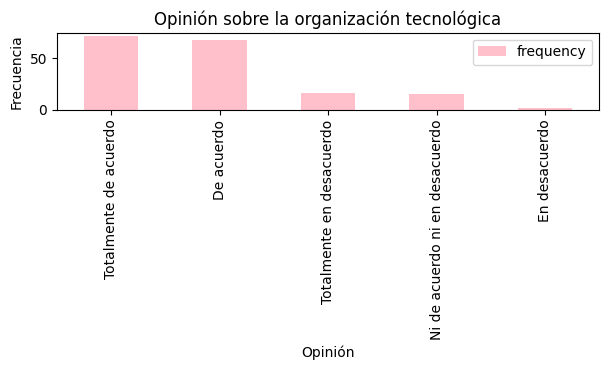

In [116]:
#REALIZAMOS UN GRAFICO DE BARRAS DEL DATA FRAME FILTRADO
technology_organization.plot(kind = 'bar', width=0.5, figsize=(7,1), color='pink')
plt.title ('Opinión sobre la organización tecnológica')
plt.xlabel('Opinión')
plt.ylabel('Frecuencia')